<a href="https://colab.research.google.com/github/abiramiraji/cognorise-hackathon/blob/main/code%20file%20/bank_train_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load libraries and data


In [1]:
# Basic libaries
import pandas as pd
import numpy as np
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# PreProcessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Logistic Regression Model And Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [2]:
dataset=pd.read_csv('/content/C&T train dataset (1).csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [4]:
dataset.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


#data preparation

In [5]:
dataset.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [6]:
#Imputing Missing Values
dataset['poi'] = np.where(dataset['poi'].isna() , dataset['poi'].median(skipna = True) , dataset['poi'])
dataset['age'] = np.where(dataset['age'].isna() , dataset['age'].median(skipna = True) , dataset['age'])
dataset['employment_st'] = np.where(dataset['employment_st'].isna() , dataset['employment_st'].mode(dropna = True) , dataset['employment_st'])
dataset['gurantors'] = np.where(dataset['gurantors'].isna() , dataset['gurantors'].mode(dropna = True) , dataset['gurantors'])
dataset['housing_type'] = np.where(dataset['housing_type'].isna() , dataset['housing_type'].mode(dropna = True) , dataset['housing_type'])

In [7]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return data


In [8]:
encode(dataset)

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,0,6,4,4,4,4,4.0,2,0,...,0,67.0,2,1,2,2,1,1,0,3
1,2,1,48,2,4,0,2,2.0,1,0,...,0,22.0,2,1,1,2,1,0,0,1
2,3,3,12,4,7,0,3,2.0,2,0,...,0,49.0,2,1,1,1,2,0,0,2
3,4,0,42,2,3,0,3,2.0,2,2,...,1,45.0,2,2,1,2,2,0,0,1
4,5,0,24,3,0,0,2,3.0,2,0,...,3,53.0,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3,9,2,3,1,1,2.0,1,0,...,1,22.0,2,0,1,2,1,0,0,2
796,797,0,18,2,1,4,4,1.0,2,0,...,1,51.0,2,2,1,2,2,1,0,1
797,798,3,12,4,3,0,1,2.0,1,0,...,1,22.0,2,0,2,1,1,0,0,3
798,799,3,24,3,0,4,4,4.0,3,0,...,2,54.0,2,1,2,2,1,1,0,3


In [9]:
dataset.drop(['sno'] , inplace = True , axis = 1)


#EDA


In [10]:
dataset.describe()

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1.582500,20.65125,2.547500,3.320000,1.106250,2.39750,2.951250,1.673750,0.142500,2.841250,1.36625,35.39625,1.676250,0.937500,1.396250,1.905000,1.147500,0.398750,0.033750,2.076250
std,1.242023,12.15635,1.084765,2.747187,1.567812,1.20054,1.121582,0.700303,0.476947,1.106833,1.06114,11.47154,0.706796,0.532868,0.569773,0.653076,0.354825,0.489947,0.180698,0.744062
min,0.000000,4.00000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.00000,19.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.00000,2.000000,1.000000,0.000000,2.00000,2.000000,1.000000,0.000000,2.000000,0.00000,27.00000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,18.00000,2.000000,3.000000,0.000000,2.00000,3.000000,2.000000,0.000000,3.000000,1.00000,33.00000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,3.000000,24.00000,4.000000,4.000000,2.000000,4.00000,4.000000,2.000000,0.000000,4.000000,2.00000,41.00000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,3.000000,72.00000,4.000000,9.000000,4.000000,4.00000,4.000000,3.000000,2.000000,4.000000,3.00000,75.00000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000


In [11]:
dataset.skew()

acc_info            0.009164
duration_month      1.149158
credit_history     -0.025128
purpose             0.597840
savings_acc         1.015169
employment_st      -0.127276
poi                -0.506821
personal_status    -0.283850
gurantors           3.307303
resident_since     -0.277252
property_type       0.034825
age                 1.065179
installment_type   -1.834254
housing_type       -0.060250
credits_no          1.267630
job_type           -0.361226
liables             1.991872
telephone           0.414346
foreigner           5.173479
Group_no           -0.123486
dtype: float64

#univariate analysis

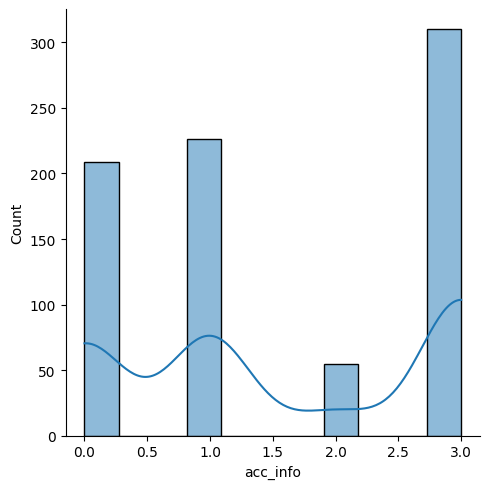

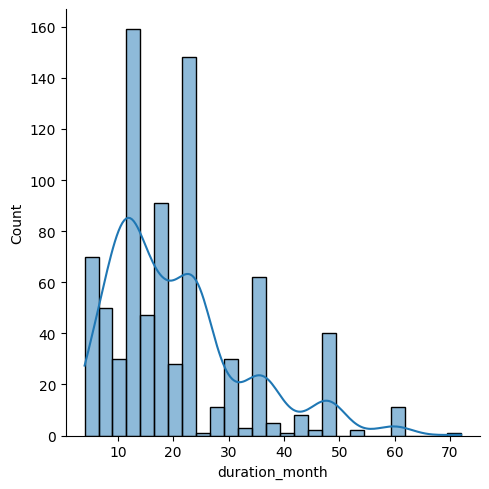

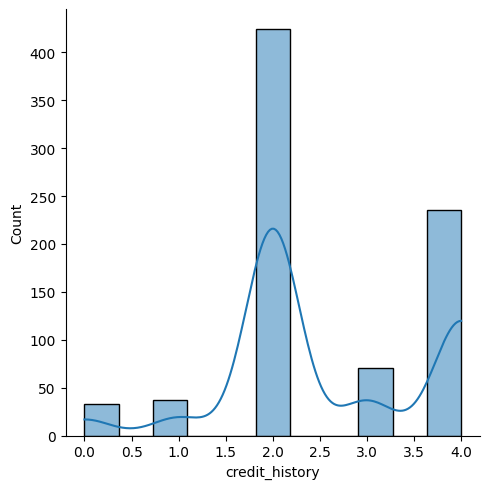

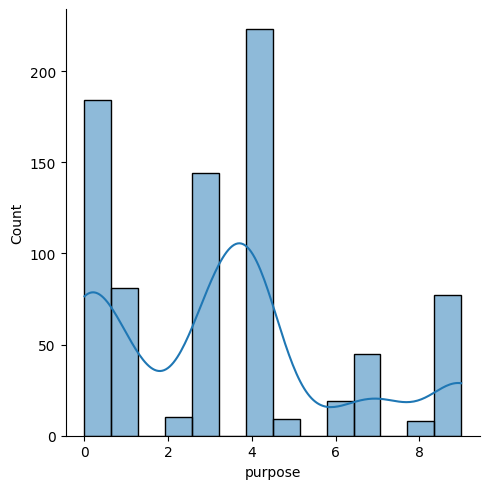

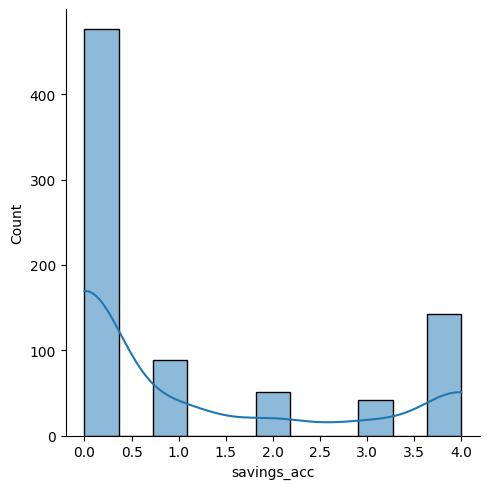

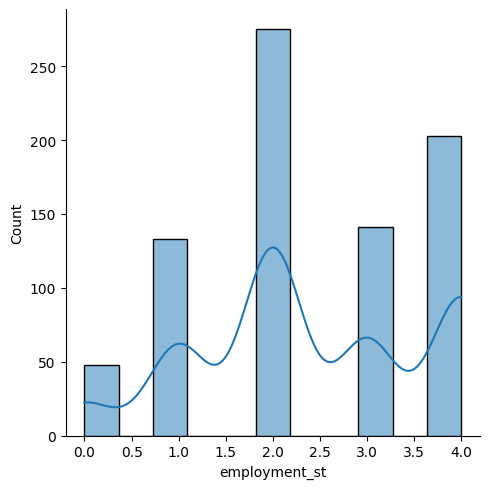

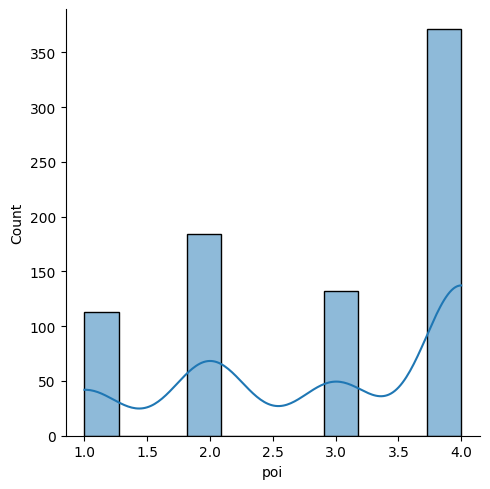

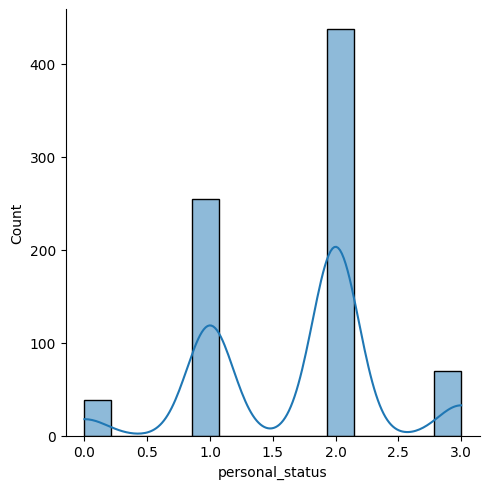

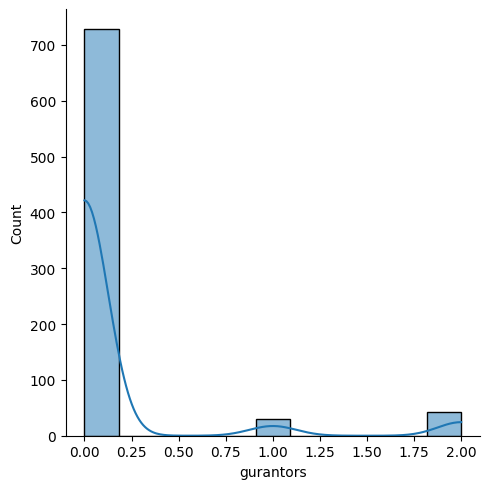

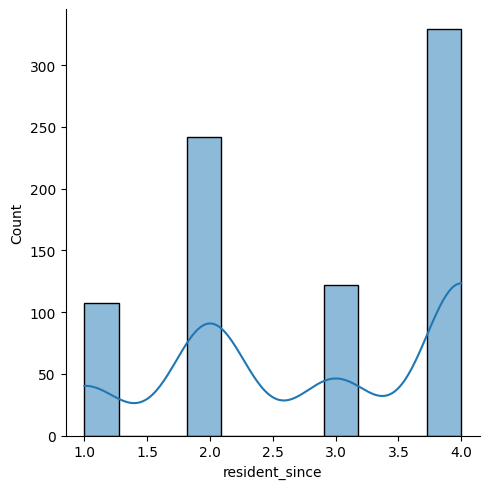

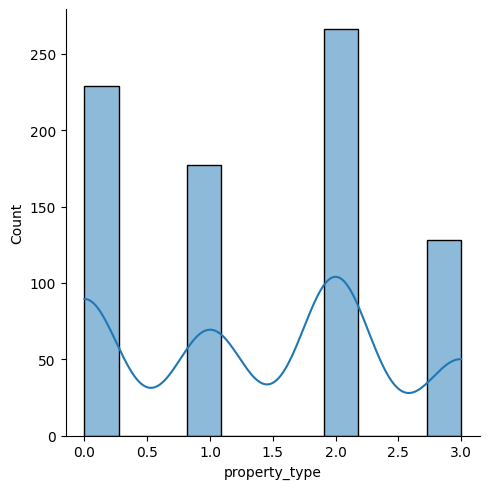

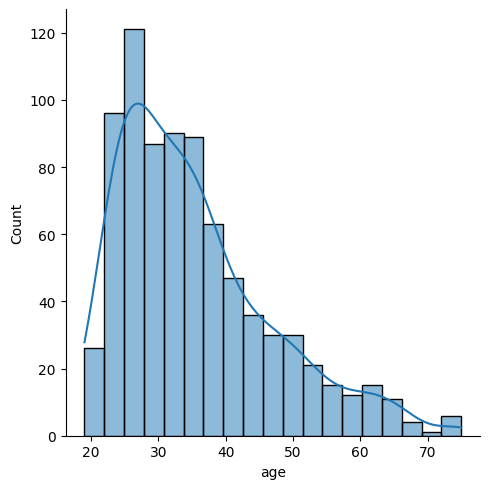

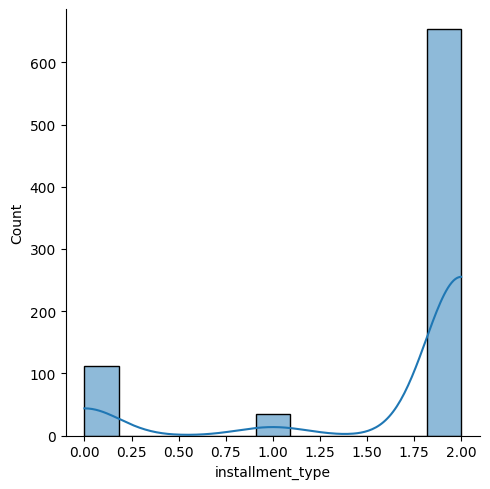

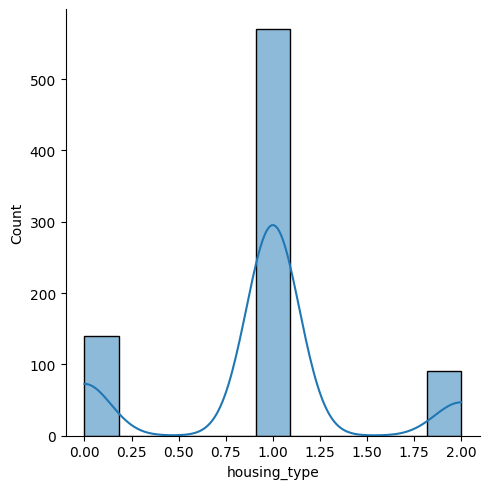

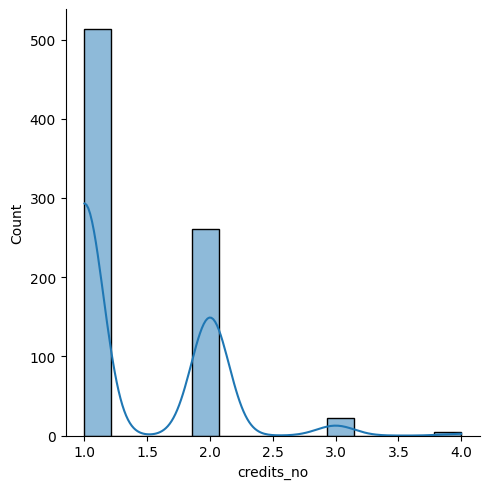

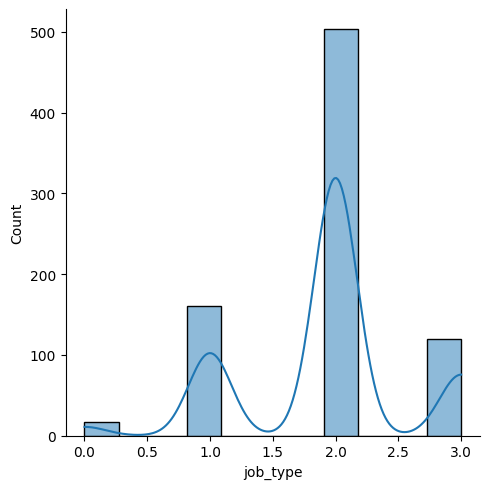

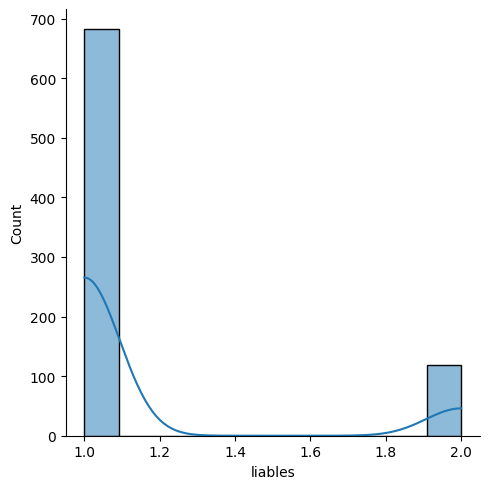

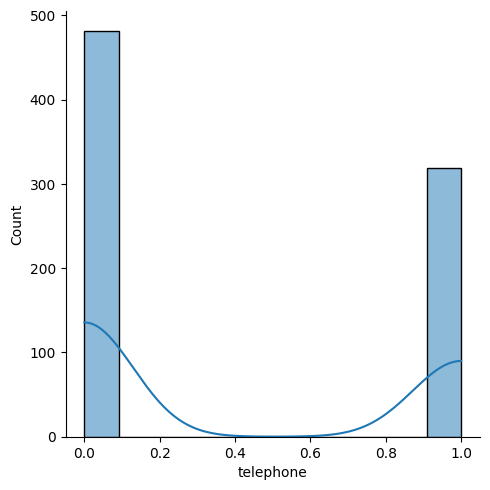

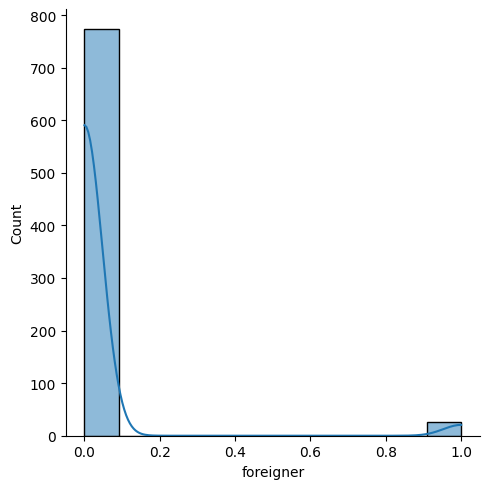

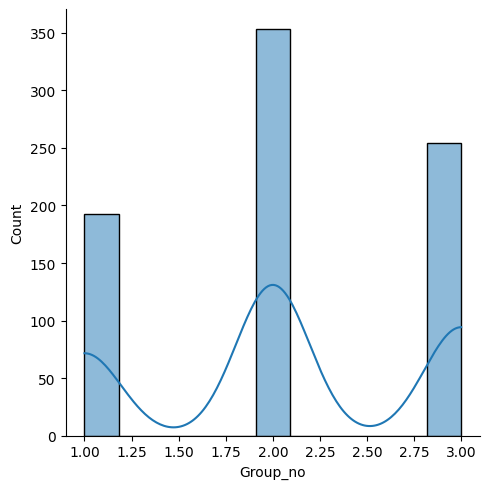

In [12]:
for i in dataset.columns :
   sns.displot(dataset[i] , kde = True)

#bivariate analysis

<Axes: >

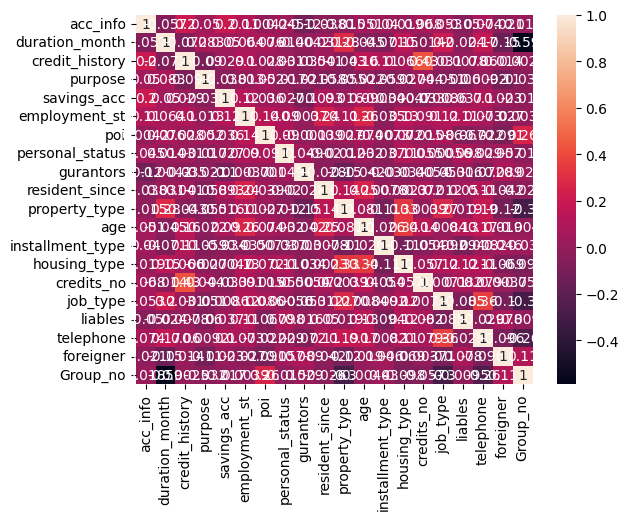

In [13]:
sns.heatmap(dataset.corr(),annot=True)

#splitting data

In [14]:
x = dataset.drop(['Group_no'] , axis = 1)
y = dataset['Group_no']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [17]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

#logistic regression

In [18]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [20]:
y_hat_train_logreg = logreg.predict(x_train)
y_hat_test_logreg = logreg.predict(x_test)

In [21]:
model_eval(y_train , y_hat_train_logreg)

The Accuracy of the Model is: 0.68
[[114  45   3]
 [ 27 193  57]
 [  1  70 130]]
              precision    recall  f1-score   support

           1       0.80      0.70      0.75       162
           2       0.63      0.70      0.66       277
           3       0.68      0.65      0.66       201

    accuracy                           0.68       640
   macro avg       0.70      0.68      0.69       640
weighted avg       0.69      0.68      0.68       640



In [22]:
model_eval(y_test , y_hat_test_logreg)

The Accuracy of the Model is: 0.61
[[18 13  0]
 [11 49 16]
 [ 0 23 30]]
              precision    recall  f1-score   support

           1       0.62      0.58      0.60        31
           2       0.58      0.64      0.61        76
           3       0.65      0.57      0.61        53

    accuracy                           0.61       160
   macro avg       0.62      0.60      0.60       160
weighted avg       0.61      0.61      0.61       160



#decision tree classifier

In [23]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
y_hat_test_dtree = dtree.predict(x_test)
y_hat_train_dtree = dtree.predict(x_train)

In [25]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the Model is: 0.64
[[ 97  64   1]
 [ 28 223  26]
 [  1 108  92]]
              precision    recall  f1-score   support

           1       0.77      0.60      0.67       162
           2       0.56      0.81      0.66       277
           3       0.77      0.46      0.58       201

    accuracy                           0.64       640
   macro avg       0.70      0.62      0.64       640
weighted avg       0.68      0.64      0.64       640



In [26]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the Model is: 0.6
[[17 14  0]
 [12 56  8]
 [ 1 29 23]]
              precision    recall  f1-score   support

           1       0.57      0.55      0.56        31
           2       0.57      0.74      0.64        76
           3       0.74      0.43      0.55        53

    accuracy                           0.60       160
   macro avg       0.62      0.57      0.58       160
weighted avg       0.62      0.60      0.59       160



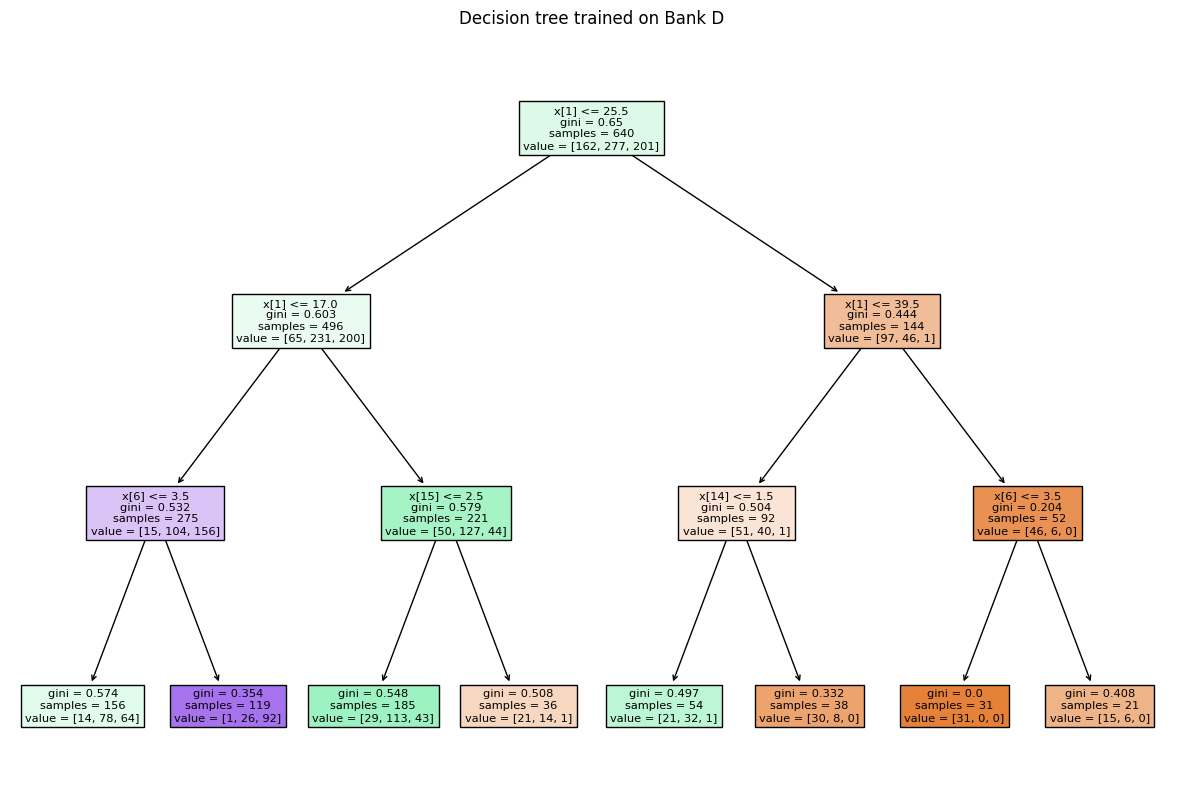

In [27]:
plt.figure(figsize=(15,10))
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on Bank D")
plt.show()

#random forest classifier

In [28]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [30]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the Model is: 0.57
[[15 16  0]
 [ 8 44 24]
 [ 1 20 32]]
              precision    recall  f1-score   support

           1       0.62      0.48      0.55        31
           2       0.55      0.58      0.56        76
           3       0.57      0.60      0.59        53

    accuracy                           0.57       160
   macro avg       0.58      0.56      0.57       160
weighted avg       0.57      0.57      0.57       160



In [31]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the Model is: 0.57
[[15 16  0]
 [ 8 44 24]
 [ 1 20 32]]
              precision    recall  f1-score   support

           1       0.62      0.48      0.55        31
           2       0.55      0.58      0.56        76
           3       0.57      0.60      0.59        53

    accuracy                           0.57       160
   macro avg       0.58      0.56      0.57       160
weighted avg       0.57      0.57      0.57       160



#application of test dataset

In [33]:
test=pd.read_csv('/content/C&T test dataset.csv')

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               200 non-null    int64  
 1   acc_info          200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_acc       200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [35]:
test.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [36]:
#Imputing Missing Values
test['poi'] = np.where(test['poi'].isna() , test['poi'].median(skipna = True) , test['poi'])
test['age'] = np.where(test['age'].isna() , test['age'].median(skipna = True) , test['age'])
test['employment_st'] = np.where(test['employment_st'].isna() , test['employment_st'].mode(dropna = True) , test['employment_st'])
test['gurantors'] = np.where(test['gurantors'].isna() , test['gurantors'].mode(dropna = True) , test['gurantors'])
test['housing_type'] = np.where(test['housing_type'].isna() , test['housing_type'].mode(dropna = True) , test['housing_type'])

In [37]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return data


In [38]:
encode(test)

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0
1,2,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0
2,3,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0
3,4,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0
4,5,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3,12,2,3,0,3,3.0,1,0,4,0,31.0,2,1,1,1,1,0,0
196,197,0,30,2,1,0,2,4.0,0,0,4,1,40.0,2,1,1,3,1,1,0
197,198,3,12,2,4,0,4,4.0,2,0,4,2,38.0,2,1,1,2,1,0,0
198,199,0,45,2,4,0,2,4.0,2,0,4,3,23.0,2,2,1,2,1,1,0


In [39]:
test.drop(['sno'] , inplace = True , axis = 1)


In [40]:
test['Group_no'] = logreg.predict(test)


In [41]:
test.head()

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0,2
1,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0,2
2,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0,2
3,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0,3
4,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0,2


# finalizing submission file

In [43]:
solution=pd.read_csv('/content/C&T Bank_sample_submission (1).csv')

In [44]:
solution.head()

,serial number,Group_no
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [45]:
solution['Group_no']=test['Group_no']

In [46]:
solution.head()

,serial number,Group_no
0,1,2
1,2,2
2,3,2
3,4,3
4,5,2


#downloading updated csv file

In [47]:
solution.to_csv('final_submission.csv',index=False)